<a href="https://colab.research.google.com/github/talorsabatani/machine-learning/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My Details
Name: Talor Sabatani  
Id: 314698408  
Link:   https://www.kaggle.com/talorsabatani

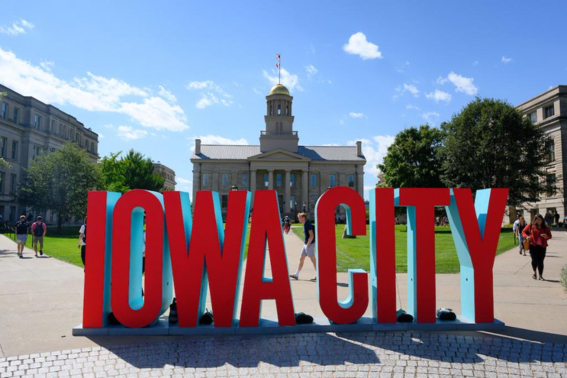

#Competition
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


## Downloads, Imports, and Definitions

We update packages that their Colab version is too old.

In [ ]:
# update plotly and pandas_profiling version
!pip install --upgrade plotly
!pip install sweetviz

# Imports

In [ ]:
import math
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import model_selection
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('fivethirtyeight')
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

##1. **Data exploration**


###Loading Datasets⏳

In [ ]:
!wget https://raw.githubusercontent.com/talorsabatani/machine-learning/main/train.csv
!wget https://raw.githubusercontent.com/talorsabatani/machine-learning/main/test.csv
!wget https://raw.githubusercontent.com/talorsabatani/machine-learning/main/data_description.txt
!wget https://raw.githubusercontent.com/talorsabatani/machine-learning/main/sample_submission.csv

**Importing the dataset**

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('/content/test.csv')
description = open('/content/data_description.txt')
print("Train set size:", train_df.shape)
print("Test set size:", test_df.shape)

Let's take a look at the data we have.


Train:

In [ ]:
train_df.head()

Test:

In [ ]:
test_df.head()

In [ ]:
# # Add price logarithm to dataset
# train_df['LogPrice'] = np.log(train_df['SalePrice'])
target = train_df['SalePrice'].copy()
# and remove SalePrice 
# train_df = train_df.drop('SalePrice', axis=1)

 
**Data Description**

---


🟣 `Train.csv`  the training set  
🟢 The `test.csv`  the test set

**Data fields**  

---
SalePrice - the property's sale price in dollars. This is the target variable   that you're trying to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  
BsmtFullBath: Basement full bathrooms    
BsmtHalfBath: Basement half bathrooms    
FullBath: Full bathrooms above grade    
HalfBath: Half baths above grade    
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
Functional: Home functionality rating  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
PavedDrive: Paved driveway  
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  



 

  
 

  




  
  


**Dataset information**

In [ ]:
print ("The train data:")
print (train_df.info())
print ("\nThe test  data:")
print (test_df.info())

###Description of datasets

In [ ]:
print(description.read())

In [ ]:
train_df.describe()

In [ ]:
test_df.describe()

Target

In [ ]:
plt.figure(figsize=(10,7))
a = sns.distplot(train_df.SalePrice, kde=False)
plt.title('SalePrice distribution')
a = plt.axvline(train_df.SalePrice.describe()['25%'], color='g')
a = plt.axvline(train_df.SalePrice.describe()['50%'], color='r')
a = plt.axvline(train_df.SalePrice.describe()['75%'], color='b')
print('SalePrice description:')
train_df.SalePrice.describe()

We can also use `sweetviz` to show a report on the data.     

In [ ]:
# #  import sweetviz and show report on usedcars_df
# import sweetviz as sw

# usedcars_report = sw.analyze(train_df)
# usedcars_report.show_notebook(layout='vertical')

   # Dropping unnecessary columns


Dealing with the missing values

In [ ]:
#find the 10 features with the highest missing values
def missing_percentage(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
  return pd.concat([total, percent], axis=1, keys=['Total','Percent'])[:10]
  
missing_percentage(test_df)

I will drop 5 features with highest present of missing values (Over then 80% missing values)

In [ ]:
train_df=train_df.drop("PoolQC",axis=1)
train_df=train_df.drop("MiscFeature",axis=1)
train_df=train_df.drop("Alley",axis=1)
train_df=train_df.drop("Fence",axis=1)

test_df=test_df.drop("PoolQC",axis=1)
test_df=test_df.drop("MiscFeature",axis=1)
test_df=test_df.drop("Alley",axis=1)
test_df=test_df.drop("Fence",axis=1)

We will drop the `id` feature.  
We know the uselessness before analyzing the data

In [ ]:
train_df=train_df.drop("Id",axis=1)

#Correlation between feature in a Heatmap🔥

In [ ]:
plt.rcParams["font.size"] = 8
plt.figure(figsize=(20,10))
cor = np.abs(train_df.corr())
train_df.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.GnBu, vmin=0, vmax=1)
plt.show()

There is a lot of features.   
I think looking at the first 14 features with the high correllation is enough to understand the data.  
It would be good to look at the correlation between these 14 features and the dependent features.  

In [ ]:
train_df.corr()['SalePrice'].sort_values(ascending=False)[1:14]


I will build new data train and data test with the 14 features with the highest correlation that I found

In [ ]:
train_df_cp = pd.DataFrame()
train_new_df= train_df[['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MasVnrArea', 'Fireplaces']].copy()
test_new_df= train_df[['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MasVnrArea', 'Fireplaces']].copy()
train_df_cp
test_new_df

### Now it will be simpler to examine the heatmap

In [ ]:
plt.rcParams["font.size"] = 8
plt.figure(figsize=(20,10))
cor = np.abs(train_new_df.corr())
train_df.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.GnBu, vmin=0, vmax=1)
plt.show()

### Analysis of the features between some of them  

`GarageCars` and `GarageArea` are effectively describing the same thing (cor = 0.88).  
`TotRmsAbvGrd` and `GrLivArea` are similar and also describe the total space above ground (corr = 0.83).   
There is strong correlation between `1stFlrSF` and `TotalBsmtSF` likely suggesting that if you have a large basement then you'll also have a large ground floor (cor = 0.82).  
There is effectively correlation between `YearBuilt` and `GarageYrBlt` when the house was built and the total square ft of the home (cor =0.83).  

## Target Correlation

In [ ]:
plt.rcParams["figure.figsize"] = (7,3)
plt.rcParams["font.size"] = 20
c = train_df.corr()
temp = c['SalePrice'].sort_values(ascending = False).reset_index()
temp = temp[temp["index"] != 'SalePrice']
temp.columns = ["Variables", "Cor"]
highly = temp[(temp["Cor"] > 0.4) | (temp["Cor"] < -0.4)].reset_index(drop = True)
# for i in highly.Variables:
plt.figure(figsize = (10, 6))  
p = sns.barplot(highly.Cor, highly["Variables"])
plt.suptitle("Target Correlation")

### Target density

In [ ]:
sns.distplot(np.log(target));

In [ ]:
# # create sunburst charts of the features
# import plotly.express as px
# train_new = train_new_df.copy()
# train_new.insert(len(train_new.columns), "count", 1, True)
# fig = px.sunburst(train_new , path=['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MasVnrArea', 'Fireplaces'], values='count')
# fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
# fig.show()
# fig = px.sunburst(insurance_df_cp2 , path=['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MasVnrArea', 'Fireplaces'], values='count', maxdepth=2)
# fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
# fig.show()

Let's see on some features with strong correlation.



Let's take a look little bit closer to our target feature.

In [ ]:
train_new_df.info()

The columns type are float64 and int64. 
Our features are numerical


In [ ]:
def plot_numerical(col, discrete=False):
  fig, ax = plt.subplots(1,2,figsize=(12,6))
  sns.stripplot(x=col, y=target, data=train_df, ax=ax[0])
  sns.countplot(train_df[col], ax=ax[1])
  fig.suptitle(str(col) + ' analysis')


### OverallQual: Overall material and finish quality
This feature is the most correlated to the target


In [ ]:
print("Correlated to the target: ")
print(train_new_df.corr()['SalePrice']['OverallQual'])
plot_numerical('OverallQual', True)

*Positive correlation*  
However, when OverallQual is ten, we have two very cheap houses: these are definitely outliers.

## GrLivArea: Above grade (ground) living area square feet


In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['GrLivArea'])
plot_numerical('GrLivArea', True)

### GarageCars:  Size of garage in car capacity

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['GarageCars'])
plot_numerical('GarageCars', True)

### GarageArea: Size of garage in square feet

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['GrLivArea'])
plot_numerical('GrLivArea', True)

## TotalBsmtSF: Total square feet of basement area

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['TotalBsmtSF'])
plot_numerical('TotalBsmtSF')

## 1stFlrSF: First Floor square feet

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['1stFlrSF'])
plot_numerical('1stFlrSF')

## FullBath: Full bathrooms above grade

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['FullBath'])
plot_numerical('FullBath', True)

## TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['TotRmsAbvGrd'])
plot_numerical('TotRmsAbvGrd', True)

## YearBuilt: Original construction date

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['YearBuilt'])
plot_numerical('YearBuilt')

## YearRemodAdd: Remodel date

In [ ]:
print("Correlated to the target: ")
print(train_df.corr()['SalePrice']['YearRemodAdd'])
plot_numerical('YearRemodAdd')

We see the houses with a GarageCars value of 4 have all low prices, really particular.
For the rest, the trend looks nice: having a GarageCars value of 3 seems the standard for very expensive homes with no exceptions.

In [ ]:
sns.barplot(x='OverallQual', y=target, data=train_df);

In [ ]:
# plot_numerical('GrLivArea')
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x='GrLivArea', y=target, data=train_df, ax=ax[0])
sns.distplot(train_df['GrLivArea'], kde=False, ax=ax[1])
fig.suptitle(str('GrLivArea') + ' analysis')

#2. Missing value🎩

---



In [ ]:
train_new_df.isnull().any()

In [ ]:
test_new_df.isnull().any()

# count empty values in each column

In [ ]:
# Finding null values 
# As our data is large so we better visualize them
train_new_df.isnull().sum().sort_values(ascending=False)

In [ ]:
test_new_df.isnull().sum().sort_values(ascending=False)

In [ ]:
test_new_df.info()

We need to fill the empty values, or remove the rows/columns that have them.

In [ ]:
# # fill empty values in the dataframe
# def fill_na_median(df, column_name):
#     df_not_null = df[~df[column_name].isnull()]
#     df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

# def fill_na_mean(df, column_name):
#     df_not_null = df[~df[column_name].isnull()]
#     df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

# def fill_na_random_pick_column_distribution(df, column_name):
#     df_not_null = df[~df[column_name].isnull()]
#     df_null = df[df[column_name].isnull()]
#     options = np.random.choice(df_not_null[column_name])
#     df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

# fill_na_median(train_df, 'age')
# fill_na_mean(train_df, 'bmi')
# fill_na_mean(train_df, 'charges')
# fill_na_random_pick_column_distribution(train_df, 'region')
# fill_na_random_pick_column_distribution(train_df, 'children')
# fill_na_random_pick_column_distribution(train_df, 'smoker')
# fill_na_random_pick_column_distribution(train_df, 'sex')
# insurance_df_cp

In both Train and Test data, Alley,PoolQC, Fence and MiscFeature have more than 80% of data missing. We can drop these columns.

In [ ]:
# train_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
def fill_na_median(df, column_name):
    cp = df.copy()
    df_not_null = cp[~cp[column_name].isnull()]
    cp[column_name] = cp[column_name].fillna(df_not_null[column_name].median()) 
    return cp

def fill_na_mean(df, column_name):
    cp = df.copy()
    df_not_null = cp[~cp[column_name].isnull()]
    cp[column_name] = cp[column_name].fillna(df_not_null[column_name].mean())
    return cp 

In [ ]:
train_new_df = fill_na_mean(train_new_df, 'GarageYrBlt')    
train_new_df.isnull().sum().sort_values(ascending=False)

In [ ]:
test_new_df = fill_na_mean(test_new_df, 'GarageYrBlt')    
test_new_df = fill_na_mean(test_new_df, 'TotalBsmtSF')    
test_new_df = fill_na_mean(test_new_df, 'GarageArea')    
test_new_df = fill_na_mean(test_new_df, 'GarageCars')    
test_new_df.isnull().sum().sort_values(ascending=False)

In [ ]:
X = train_new_df.copy()
t = target
print('X')
display(X)
print()
print('t')
display(t)

In [ ]:
X.info()

In [ ]:
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [ ]:
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px

# plot the score by split and the loss by split
def plot_score_and_loss_by_split(X, t):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    'train_R2': {},
                    'val_R2': {}
                    }
    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=size/100, random_state=42)
        NE_reg = linear_model.LinearRegression().fit(X_train, t_train)
        y_train = NE_reg.predict(X_train)
        y_val = NE_reg.predict(X_val)
        graph_points['train_MSE'][size/100] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][size/100] = metrics.mean_squared_error(t_val, y_val)
        graph_points['train_R2'][size/100] = NE_reg.score(X_train, t_train)
        graph_points['val_R2'][size/100] = NE_reg.score(X_val, t_val)
    print_graphs_r2_mse(graph_points)

plot_score_and_loss_by_split(X, t)

In [ ]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import plotly.graph_objects as go

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

In [ ]:
test_new_df

In [ ]:
# find generator length
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [ ]:
# determine categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [ ]:
# use column transformer to insert different transformers for each column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold


ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, transformer=ct, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

תרגול 7

SGDRegressor

In [ ]:
# print lasso, ridge and elasticnet scores as regression 
from sklearn.model_selection import cross_val_score

sgd_lasso = make_pipeline(StandardScaler(), SGDRegressor(penalty='l1', random_state=1))
sgd_ridge = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', random_state=1))
sgd_elastic = make_pipeline(StandardScaler(), SGDRegressor(penalty='elasticnet', random_state=1))

print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso), X, t, cv=15).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), X, t, cv=15).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic), X, t, cv=15).mean())

In [ ]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

X_normalized = StandardScaler().fit_transform(X)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters).fit(X_normalized, t)
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

In [ ]:
# train with random search and get best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import SGDClassifier

np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])
X_normalized = StandardScaler().fit_transform(X)
rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(X_normalized, t)
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)